In [5]:
# Bibliotecas utilizadas e últimos 3 dígitos da matrícula

import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np

mat1 = [6, 1, 1]

Coeficiente a_0: 4.317026906253702
Coeficiente a_1: 0.046830657827502585
Coeficiente alfa_1: 74.96541742928407
Coeficiente beta_1: 0.046830657827502585
f(x) = 74.96541742928407 * e^(0.046830657827502585 * x)
[0, 4, 8, 12, 16, 20]
[np.float64(74.96541742928407), np.float64(90.40951692388381), np.float64(109.03535297619825), np.float64(131.4984152459669), np.float64(158.58923496102628), np.float64(191.26120568433979)]


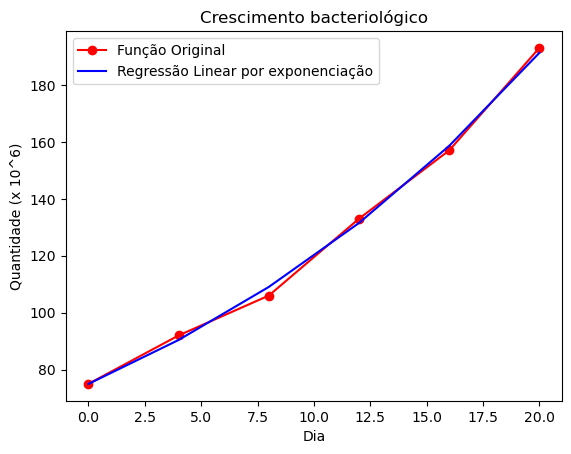

In [6]:
# Questão 1
k = np.sum(mat1)
x = [0, 4, 8, 12, 16, 20]
y = [67 + k, 84 + k, 98 + k, 125 + k, 149 + k, 185 + k]
reta = [0 for _ in range(len(x))]

# Exponencial
n = len(x)
soma_x = sum(x)
soma_y = sum(y)
soma_log_y = sum((np.log(y[i])) for i in range(len(x)))
soma_x_quadrado = sum([x[i]**2 for i in range(len(x))])
soma_x_log_y = sum(x[i] * np.log(y[i]) for i in range(len(x)))

media_x = np.mean(x)
media_log_y = np.mean(np.log(y))

numerador = (n * soma_x_log_y) - (soma_x * soma_log_y)
denominador = (n * soma_x_quadrado) - (soma_x ** 2)

angular = numerador / denominador
linear = media_log_y - (angular * media_x)

alfa1 = np.e ** linear
beta1 = angular

exponencial = lambda x : alfa1 * np.e ** (beta1 * x)

print(f"Coeficiente a_0: {linear}")
print(f"Coeficiente a_1: {angular}")
print(f"Coeficiente alfa_1: {alfa1}")
print(f"Coeficiente beta_1: {beta1}")
print(f"f(x) = {alfa1} * e^({beta1} * x)")

for i in range(len(x)):
	reta[i] = exponencial(x[i])

print(x)
print(reta)

plt.plot(x, y, color='red', marker='o', label="Função Original")
plt.plot(x, reta, color='blue', label="Regressão Linear por exponenciação")

plt.title("Crescimento bacteriológico")
plt.xlabel("Dia")
plt.ylabel("Quantidade (x 10^6)")
plt.legend()

plt.show()

Coeficientes do polinômio interpolador de Lagrange (ordem 2):
[ 13.88888889 -62.5         70.44444444]

f(2.8) = 4.333333333333332

f(2) = 1.0


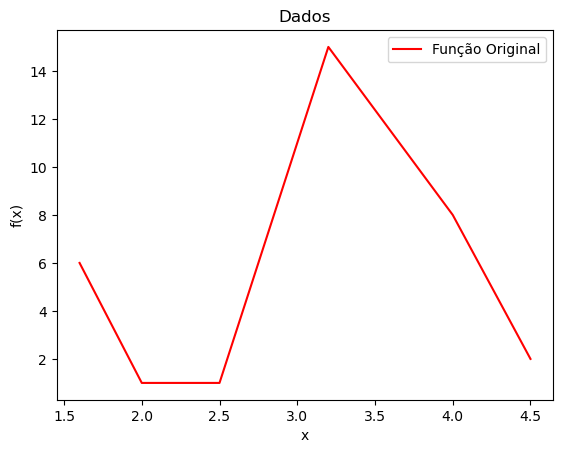

In [7]:
# Questão 2

x = [1.6, 2, 2.5, 3.2, 4, 4.5]
y = [mat1[0], mat1[1], mat1[2], 15, 8, 2]

def lagrange_coeficientes(x, y):
    """
    Retorna os coeficientes do polinômio interpolador de Lagrange
    na forma expandida (coeficientes do polinômio em x^n + ... + a0)
    """
    n = len(x)
    # Começa com polinômio 0
    P = np.zeros(n)

    # Construção do polinômio de Lagrange
    for i in range(n):
        # L_i(x) começa como [1]
        Li = np.array([1.0])
        denom = 1.0

        for j in range(n):
            if i != j:
                # Multiplica o polinômio por (x - xj)
                Li = np.convolve(Li, np.array([1.0, -x[j]]))
                denom *= (x[i] - x[j])

        # Soma f(xi) * L_i(x) / denom no polinômio final
        P += (y[i] / denom) * Li

    return P  # retorna coeficientes do maior grau até o termo constante


def lagrange_avaliar(x, y, xp):
    """
    Avalia diretamente o polinômio de Lagrange sem expandir.
    """
    total = 0.0
    n = len(x)

    for i in range(n):
        Li = 1.0
        for j in range(n):
            if j != i:
                Li *= (xp - x[j]) / (x[i] - x[j])
        total += y[i] * Li

    return total

ordem = 2
x_ord = x[:ordem+1]
y_ord = y[:ordem+1]

# Coeficientes do polinômio
coef = lagrange_coeficientes(x_ord, y_ord)

print(f"Coeficientes do polinômio interpolador de Lagrange (ordem {ordem}):")
print(coef)

xp = 2.8
valor = lagrange_avaliar(x_ord, y_ord, xp)
print(f"\nf({xp}) = {valor}")

xp = 2
valor = lagrange_avaliar(x_ord, y_ord, xp)
print(f"\nf({xp}) = {valor}")

plt.plot(x, y, color='red', label="Função Original")

plt.title("Dados")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

plt.show()

k: 0.06
x: [0. 3. 6.]
steps: 3
len(x) - 1: 2
Heun (0.50): [3.         2.94826446 2.89697892]
Heun (0.25): [3.         2.97407561 2.94826372]


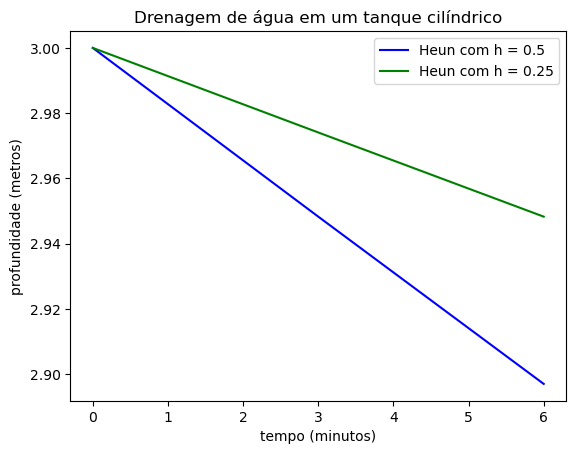

In [ ]:
# Questão 3

k = mat1[0] / 100
steps = 6
x = np.linspace(0, 5 + mat1[2], steps)

print(f"k: {k}")
print(f"x: {x}")
print(f"steps: {steps}")
print(f"len(x) - 1: {len(x) - 1}")

phi = lambda x, y : -k * np.sqrt(y)

# Para h = 0.5
h = 0.5
y_50 = np.zeros(steps)
y_50[0] = 3

for i in range(len(x) - 1):
	preditora = y_50[i] + phi(x[i], y_50[i]) * h
	y_50[i+1] = y_50[i] + (h/2) * (phi(x[i], y_50[i]) + phi(x[i+1],preditora))

print(f"Heun (0.50): {y_50}")

# Para h = 0.25
h = 0.25
y_25 = np.zeros(steps)
y_25[0] = 3

for i in range(len(x) - 1):
	preditora = y_25[i] + phi(x[i], y_25[i]) * h
	y_25[i+1] = y_25[i] + (h/2) * (phi(x[i], y_25[i]) + phi(x[i+1],preditora))

print(f"Heun (0.25): {y_25}")

plt.plot(x, y_50, color='blue', label="Heun com h = 0.5")
plt.plot(x, y_25, color='green', label="Heun com h = 0.25")

plt.title("Drenagem de água em um tanque cilíndrico")
plt.xlabel("tempo (minutos)")
plt.ylabel("profundidade (metros)")
plt.legend()

plt.show()